## Final Project Submission

Please fill out:
* Student name: Fernando Aguilar Islas
* Student pace: Part Time
* Scheduled project review date/time: Friday, April 5, 2019
* Instructor name: Brandon Lewis
* Blog post URL:

# King's County Data Set

For this project, I will create a multi-factor model using housing features contained in the King's County data set to predict house prices. Throughout the project, I will be using the OSEMN model consisting of the following steps: Obtain, Scrub, Explore, Model, and iNterpret the data. The information given for the data set features the following:

### Column Names and descriptions
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## 1. Obtain
The main objective of this project is to derive a multi-factor model that predicts housing prices as accurately as possible, using relevant features only.
I will start by importing the necessary libraries and obtaining the data from the file 'kc_house_data.csv' to start my Exploratory and Data Analysis (EDA).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


* The dataframe contains 21 columns and 21,597 rows. From this information, I can see that the following variables have null values: waterfront, view, and yr_renovated.
* Also, there are some variables with the incorrect datatype. I will address this issue after exploring the data and determining their correct datatype and change accordingly.
* Price is the target variable, leaving 20 features to construct the model.<br><br>
To start exploring the data I am going to visualize the first rows of the dataframe to see a sample of the values cointained in them. I will split them in two to be able to visualize all columns.

In [3]:
df.iloc[:5,:10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0


In [4]:
df.iloc[:5,10:]

,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## 2. Scrub
For this stage, I am going to iterate through each of the columns to verify and assign correct datatypes,  identify and remove null values, and dummy values. It is also common to deal with outliers during this stage, but I will leave this process to be carried out during data exploration in the next stage.

In [5]:
#set date values as date datatype
df['date'] = pd.to_datetime(df['date'])
df.date.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [6]:
#Bathrooms should be an integer. For the purpose of this project full and half-bathrooms will be unitary.
#For this I am assuming that any fraction entered above the unit is another bathroom, i.e. 2.25 = 3 bathrooms.
df['bathrooms'] = df['bathrooms'].apply(lambda x: math.ceil(x)).astype(int)
df.bathrooms.head()

0    1
1    3
2    1
3    3
4    2
Name: bathrooms, dtype: int64

In [7]:
#Floors should be an integer by definition.
df['floors'] = df['floors'].astype(int)
df['floors'].head()

0    1
1    2
2    1
3    1
4    1
Name: floors, dtype: int64

In [8]:
#Waterfront is a categorical value given that a house is either waterfront property or not.
#Since waterfront has null values, I will susbtitute the values as 1 for waterfront and 0 elsewhere.
print(df.waterfront.isna().sum())
print(df.waterfront.value_counts())

2376
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [9]:
#Waterfront has 2,3736 null values. About 10% of our entire dataset. Hence, deleting is not an option.
#I will assume these houses are not waterfront properties, because most properties in the data set are not.
df['waterfront'].fillna(0, inplace=True)
#Correct datatype is category.
df['waterfront'] = df['waterfront'].astype('category')
print(df['waterfront'].dtypes)
print(df['waterfront'].value_counts())

category
0.0    21451
1.0      146
Name: waterfront, dtype: int64


In [10]:
print(df['view'].value_counts())
print(df['view'].describe())
print('Missing values: ', df['view'].isna().sum())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64
Missing values:  63


Home views range from 0 (no views) to 4. It contains 63 missing values. I will replace these values with 0.<br>
Most homes have not been viewed. Hence I believe this variable would be better utilized as a binary category, as either a house has been viewed (1) or not (0).

In [11]:
#replace null values with 0.
df['view'].fillna(0, inplace=True)
print('Missing Values: ', df.view.isna().sum())
#Set all values above 0 to 1.
df['view'] = df['view'].apply(lambda x: 1 if (x>0) else 0).astype('category')
print(df.view.value_counts())
print(df['view'].dtypes)

Missing Values:  0
0    19485
1     2112
Name: view, dtype: int64
category


In [12]:
#Changing condition type to category.
df['condition']=df['condition'].astype('category')

Trying to change the basement category, the system provided an error indicating the prescence of a non numerical value '?'. First I will replace this value with a 0, since most houses do not have a basement. And then, change it to its correct datatype: integer.

In [13]:
#This gives an error, so propbably I should explore the data contained first to find the error value: '?'.
#I will first check the values in the series.
print('Missing Values: ', df.sqft_basement.isna().sum())
df.sqft_basement.value_counts()[:10]

Missing Values:  0


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
Name: sqft_basement, dtype: int64

The series contains 454 '?' characters, and there should only be numbers. Since most values are 0, I will start by replacing the '?' with a value of 0.

In [14]:
#Replace '?' with a value of 0 and define the correct category as integer.
df['sqft_basement'] = df['sqft_basement'].replace('?',0).astype(float).astype(int)
print(df['sqft_basement'].dtype)

int64


In [15]:
#yr_renovated should be an integer and null values replace with 0 since they are most likely not renovated.
print('Missing values: ',df['yr_renovated'].isna().sum())
df['yr_renovated'] = df['yr_renovated'].fillna(0).astype(int)
df['yr_renovated'].value_counts().head()

Missing values:  3842


0       20853
2014       73
2003       31
2013       31
2007       30
Name: yr_renovated, dtype: int64

Last but not least zip codes are categorical. All other columns not mentioned in this section appear to be fine. During the scrub stage, I might have to revisit and make other changes accordingly.

In [16]:
df['zipcode'] = df.zipcode.astype('category')
df['zipcode'].value_counts().head()

98103    602
98038    589
98115    583
98052    574
98117    553
Name: zipcode, dtype: int64

So far I have made minor data cleaning in order to have a functional dataframe to work with during the exploratory stage of the project.

## 3. Exploration
During this stage, I will delve deeper into the data, try to find outliers, and deal with them appropriately. I will also look for correlation amongst the variables and will solve the following questions:
* Is it worth renovating your home?
* What zip codes have seen the most price increase over time?
* Does having a higher grade translate to a higer price?<br>
Let's have a quick look at our slightly cleaner data:

In [17]:
print(df.info())
print(df.head())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null int64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null int64
waterfront       21597 non-null category
view             21597 non-null category
condition        21597 non-null category
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null category
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(4), datetime64[ns](1), float64(3), int64(13)
memo

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.440478,2080.321850,1.509941e+04,1.445988,7.657915,1788.596842,285.716581,1970.999676,68.758207,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.922309,918.106125,4.141264e+04,0.551658,1.173200,827.759761,439.819830,29.375234,364.037499,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,3.000000,1910.000000,7.618000e+03,1.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,3.000000,2550.000000,1.068500e+04,2.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


### 3.1 Check bedroom and bathroom units
From the table above, we can see that 33 bedrooms and 8 bathrooms may not be realistic for the houses in our data set. Hence, I will create box plots to test for outliers in these variables.

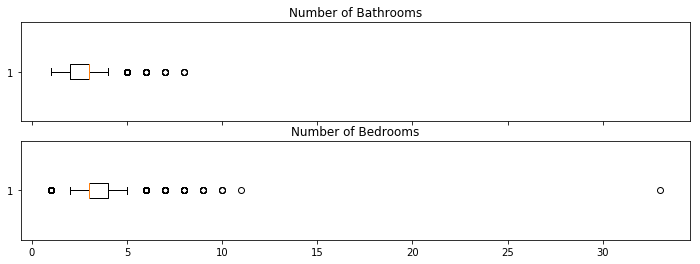

In [18]:
#boxplot bedrooms and bathrooms to check for outliers.
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (12,4), sharex=True)
ax1.boxplot(df.bathrooms, vert=False)
ax2.boxplot(df.bedrooms,vert=False)
ax1.set_title('Number of Bathrooms')
ax2.set_title('Number of Bedrooms')
plt.show()

In [19]:
#Find out the size of the home with 33 bedrooms to see if it is possible that it can have that many.
print('Size: ',df[df['bedrooms']==33].sqft_living.values)
#Find out how many restrooms the home has.
print('Bathrooms: ',df[df['bedrooms']==33].bathrooms.values)
#Instead of dropping it I would like to see if there is a comparable home and see how many rooms it has.
print('Comparable houses (bedrooms): ',df[df['sqft_living'].between(1600,1650, inclusive=True)].bedrooms.describe())
print('Comparable houses (bathrooms): ',df[df['sqft_living'].between(1600,1650, inclusive=True)].bathrooms.describe())

Size:  [1620]
Bathrooms:  [2]
Comparable houses (bedrooms):  count    658.000000
mean       3.142857
std        1.287199
min        2.000000
25%        3.000000
50%        3.000000
75%        3.000000
max       33.000000
Name: bedrooms, dtype: float64
Comparable houses (bathrooms):  count    658.000000
mean       2.262918
std        0.703887
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: bathrooms, dtype: float64


From comparing other houses wth similar living space, I think the value of 33 bedrooms is most likely a typing error and should have been 3 bedrooms. Most houses with similar square footage have a median of 3 bedrooms and 2 bathrooms.
Since there are homes with up to 11 bedrooms and those houses are likely to have 8 bathrooms, I am not going to modify the bathroom outliers.

In [20]:
#Replace the 33 bedrooms for 3.
df.bedrooms.replace(33,3,inplace=True)

### 3.2  Is renovating your home worth it?
The variable 'id' is per home and each record is a transaction. Hence, an id can be repeated if a home has had more than one transaction, in other words, sold more than once. I will check to see how many duplicate id's are in the data set.

In [21]:
print("Number of duplicated id's :", df.id.duplicated(keep=False).sum())
#Get data set with homes with at least two transactions
df_duplicates = df[df.id.duplicated(keep=False)][['id', 'price', 'yr_renovated', 'date']]
#Find out the transactions with renovations performed before being sold.
reno_df = df_duplicates[df_duplicates['yr_renovated']<df_duplicates['date'].dt.year]
#Remove non renovated units
reno_df = reno_df[reno_df['yr_renovated']>0]
print('Number of transactions for renovated homes: ',len(reno_df))
reno_df.head()

Number of duplicated id's : 353
Number of transactions for renovated homes:  8


,id,price,yr_renovated,date
324,7520000520,232000.0,1984,2014-09-05
325,7520000520,240500.0,1984,2015-03-11
717,8820903380,452000.0,1990,2014-07-28
718,8820903380,730000.0,1990,2015-01-02
3946,1825069031,550000.0,1980,2014-08-14


The sample is too small to create any insightful analysis to the data. Since some homes are as old as a century and it is very unlikely they have been in the market without any major renovations, there are probably missing yr_renovated values. Also, all of these homes were sold twice after the renovations, so a direct comparison between before and after renovation prices is not possible.<br>
I am changing the approach and comparing prices between homes sold with and without renovations.

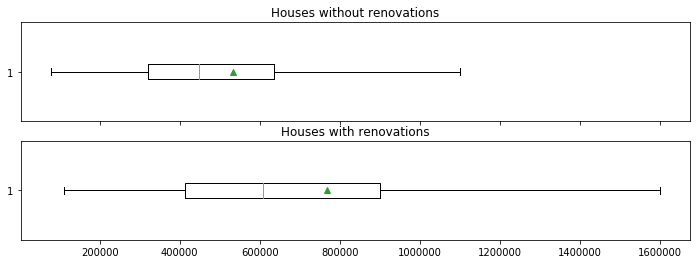

House prices without renovations median: $ 449000
House prices with renovations median: $ 607502
Percentage increase in price with renovations 35 %


In [22]:
#Create two sets of data, one for transactions without renovations and one with renovations.
prices_woreno = df[df['yr_renovated']== 0].price
prices_reno = df[df['yr_renovated']!= 0].price
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (12,4), sharex=True)
#Create boxplot without outliers for better visualization.
ax1.boxplot(prices_woreno, vert=False, showfliers=False, showmeans=True)
ax2.boxplot(prices_reno,vert=False, showfliers=False, showmeans=True)
ax1.set_title('Houses without renovations')
ax2.set_title('Houses with renovations')
plt.show()
print('House prices without renovations median: $',int(prices_woreno.median()))
print('House prices with renovations median: $',int(prices_reno.median()))
print('Percentage increase in price with renovations',
      int(float((prices_reno.median()-prices_woreno.median())/prices_woreno.median())*100),'%')

Houses without renovations sell for a meadian of 449,000.00 USD while houses with renovations sell for a median of  607,502.00 USD which repesents a 35% higher price. From this analysis, I conclude that **it is definitely worth renovating a home before selling it.** A better analysis could be achieved by collecting renovation budgets and having transaction records before and after the renovations.

### 3.3 What zip codes have seen the most price increase over time?

In [23]:
#Get an array with unique zipcodes.
zipcodes = df.zipcode.astype(int).unique()
#Find out how many different zipcodes there are.
print('Number of unique zipcodes: ', zipcodes.shape[0])
#Get date of earliest transaction
print('Earliest transaction date: ',df.date.min())
#Get date of latest transaction
print('Latest transaction date: ',df.date.max())

Number of unique zipcodes:  70
Earliest transaction date:  2014-05-02 00:00:00
Latest transaction date:  2015-05-27 00:00:00


Given this information, I will start by grouping the transactions per month to be able to compare the monthly average prices amongst zipcodes over the course of a year.

In [25]:
df_months = df[['date','price','zipcode']].copy()
#normalize day to beginning of month.
df_months['YearMonth'] = df_months['date'] + pd.offsets.MonthBegin(1)
df_months['YearMonth'] = df_months['date'].map(lambda dt: dt.replace(day=1))
df_months.drop('date',axis=1, inplace=True)
deltas_dict = {}
for zipcode in zipcodes:
    #Create temporary dataframe with transactions at a certain zipcode
    df_temp = df_months[df_months['zipcode']== zipcode].copy()
    #Get median value of the transactions per month. Median valueas are used to offset outlier effects.
    df_temp = df_temp.groupby('YearMonth').price.median()
    #Create a list to store month to month price changes.
    month_delta = []
    for i in range(len(df_temp)-1):
        #Calculate month to month change in median prices.
        delta = (df_temp[i+1]- df_temp[i])/df_temp[i]
        month_delta.append(delta)
    month_delta = np.array(month_delta)
    #Calculate monthly average price change as percentage.
    delta = round(month_delta.mean()*100,2)
    deltas_dict[zipcode] = delta
#Create dataframe 
df_deltas = pd.DataFrame.from_dict(deltas_dict,orient='index', columns=['m_delta'])
#Top 5 zipcodes.
print('The top 5 zipcodes are: ', list(df_deltas.sort_values('m_delta', axis=0, ascending=False).index[:5]))
df_deltas.sort_values('m_delta', axis=0, ascending=False).head()

The top 5 zipcodes are:  [98024, 98014, 98112, 98006, 98022]


,m_delta
98024,9.83
98014,6.62
98112,6.43
98006,5.05
98022,4.81


From the table we get the top 5 zipcodes with the highest percentage price increase per month.

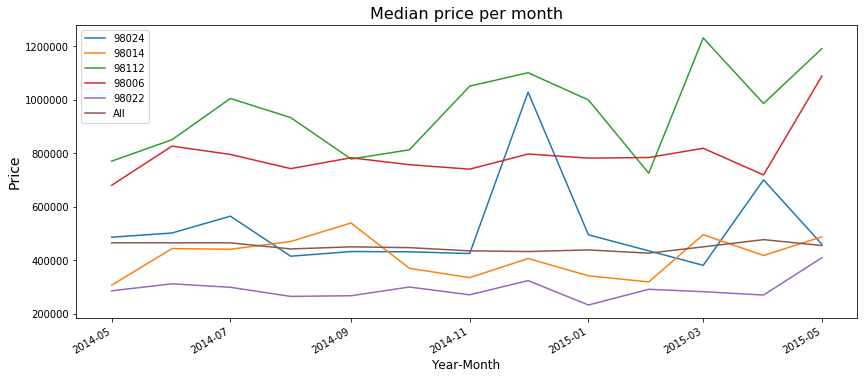

In [27]:
#Create list of top 5 zipcodes
top5_zip= list(df_deltas.sort_values('m_delta', axis=0, ascending=False).index[:5])
#Create figure 
fig = plt.figure(figsize=(14,6))
for zipcode in top5_zip:
    df_temp = df_months[df_months['zipcode']== zipcode].copy()
    df_temp = df_temp.groupby('YearMonth').price.median()
    df_temp.plot(label=zipcode, legend=True)
df_temp = df_months.groupby('YearMonth').price.median()
df_temp.plot(label='All', legend=True)
plt.title('Median price per month',fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=14)
plt.show();

House prices remain quite stable overall. The median price of a home at the begining of the period is not much different from the final prices, resulting in no real returns. However, individual zipcodes appear to be more volatile through time. It is apparent that the high average monthly price increase on zipcode 98024 is due to a very high price increase on december 2015. On the other hand, all other values have a positive difference between their beginning and ending values. Zipcodes 98112 and 98006 apart from having high average price increases per month, they also show a high increse from their begining values.
On a side note, I notice that zipcodes have somewhat defined price floors and ceilings, meaning houses from the same zipcode share similar characteristics amongst each other.

### 3.4  Does having a higher grade translate to a higer price?
I am inclined to assume that any given person would be willing to pay a premium to buy a better quality home. The process of comparing house quality has been facilitated by King County by issuing a rubric provided to efficiently assign a grade to a house.

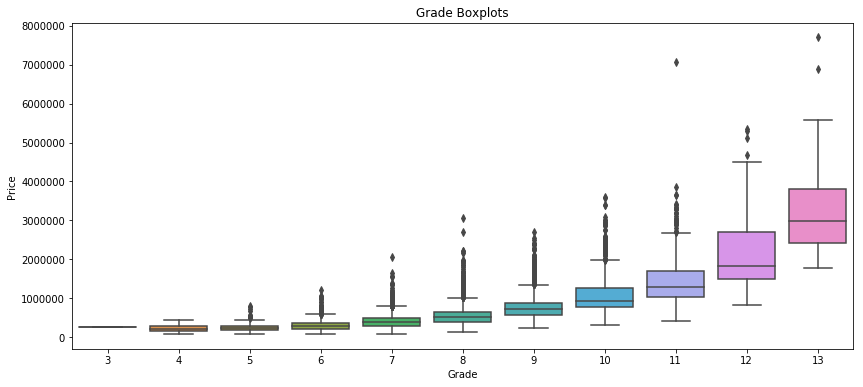

In [55]:
#Create a subset of teh database with the variables needed for the analysis.
fig = plt.figure(figsize=(14, 6))
fig = sns.boxplot(x='grade', y='price', data=df)
plt.title('Grade Boxplots')
plt.ylabel('Price')
plt.xlabel('Grade')
plt.show()

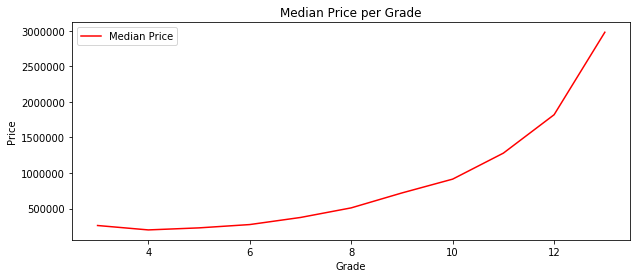

In [54]:
df_grade=df[['grade','price']].groupby('grade').median().copy()
df_grade.reset_index(inplace=True)
fig = plt.figure(figsize=(10, 4))
fig = sns.lineplot(x='grade', y='price', color='red',data=df_grade, label='Median Price')
plt.ylabel('Price')
plt.xlabel('Grade')
plt.title('Median Price per Grade')
plt.show()

## 4. Model